In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df_stu_mat = pd.read_csv("C:\\Users\\hp\\Downloads\\student-mat.csv")
df_stu_por = pd.read_csv("C:\\Users\\hp\\Downloads\\student-por.csv")
print("Student_mat Dataset:\n")
print(df_stu_mat.head(10))
print("Student_por Dataset:\n")
print(df_stu_por.head(10))

Student_mat Dataset:

  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        6 

In [3]:
#checking missing values
print ("Missing values in Student_mat:\n",df_stu_mat.isnull().sum())

print ("Missing values in Student_por:\n",df_stu_por.isnull().sum())

Missing values in Student_mat:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
Missing values in Student_por:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime   

In [4]:
#Basic info, statistical summaries

print("Student_mat Dataset:")
print("Dataset shape:",df_stu_mat.shape)

print("Statistical Summary:")
print(df_stu_mat.describe())

print("Dataset Info:")
df_stu_mat.info()

print("Student_por Dataset:")
print("Dataset shape:",df_stu_por.shape)

print("Statistical Summary:")
print(df_stu_por.describe())

print("Dataset Info:")
df_stu_por.info()

Student_mat Dataset:
Dataset shape: (395, 33)
Statistical Summary:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861

In [5]:
duplicates_mat = df_stu_mat.duplicated().sum()
print("Duplicates in Student_mat:",duplicates_mat)

duplicates_mat = df_stu_por.duplicated().sum()
print("Duplicates in Student_por:",duplicates_mat)

Duplicates in Student_mat: 0
Duplicates in Student_por: 0


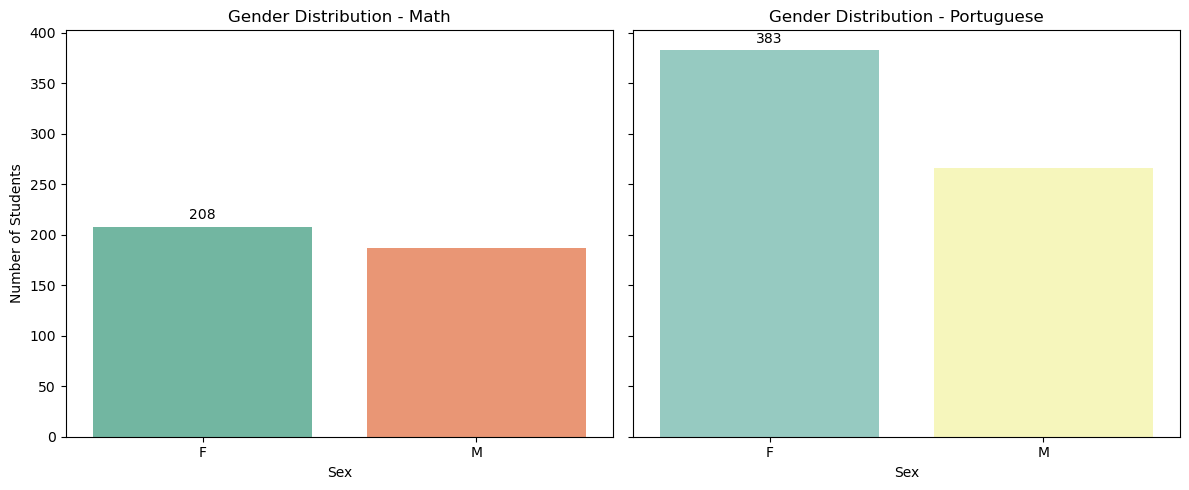

In [6]:
#Univariate Analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
# Math dataset
sns.countplot(data=df_stu_mat, x='sex', hue='sex', ax=axes[0], palette='Set2')
axes[0].set_title('Gender Distribution - Math')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Number of Students')
axes[0].bar_label(axes[0].containers[0], padding=3)
# Portuguese dataset
sns.countplot(data=df_stu_por, x='sex', hue = 'sex', ax=axes[1], palette='Set3')
axes[1].set_title('Gender Distribution - Portuguese')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('')
axes[1].bar_label(axes[1].containers[0], padding=3)

plt.tight_layout()
plt.show()

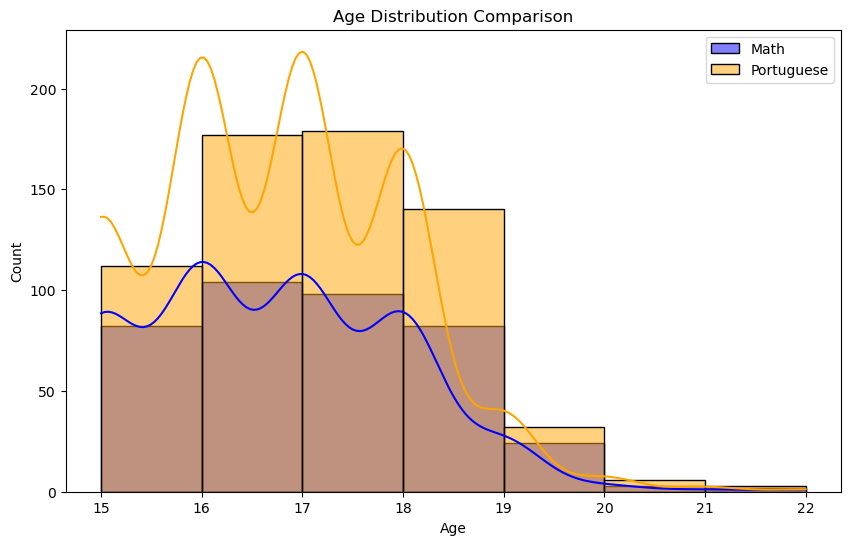

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df_stu_mat['age'], bins=7, kde=True, color='blue', alpha=0.5, label='Math')
sns.histplot(df_stu_por['age'], bins=7, kde=True, color='orange', alpha=0.5, label='Portuguese')
plt.title("Age Distribution Comparison")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

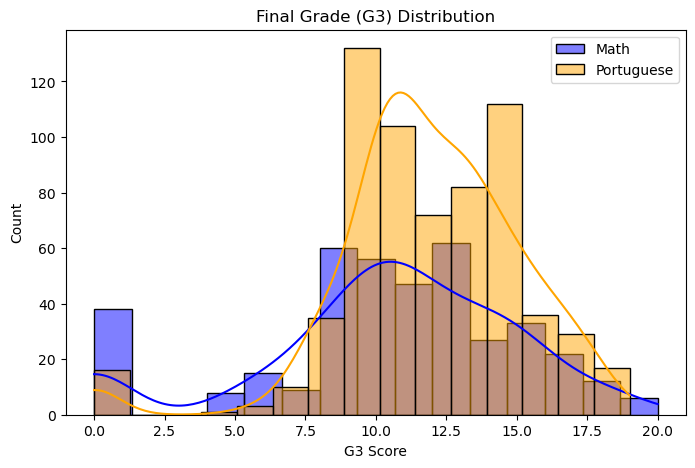

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df_stu_mat['G3'], color='blue', label='Math', kde=True, bins=15, alpha=0.5)
sns.histplot(df_stu_por['G3'], color='orange', label='Portuguese', kde=True, bins=15, alpha=0.5)
plt.title('Final Grade (G3) Distribution')
plt.xlabel('G3 Score')
plt.ylabel('Count')
plt.legend()
plt.show()

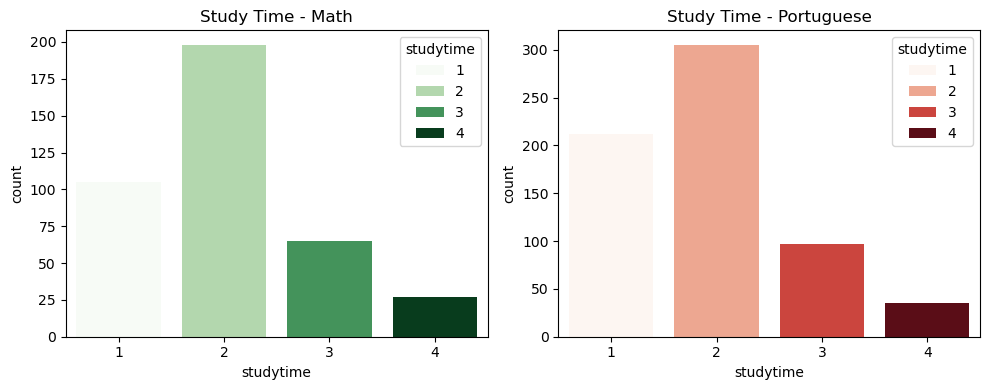

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# Math dataset
sns.countplot(data=df_stu_mat, x='studytime', hue='studytime', palette='Greens', ax=axes[0])
axes[0].set_title('Study Time - Math')
# Portuguese dataset
sns.countplot(data=df_stu_por, x='studytime', hue='studytime', palette='Reds', ax=axes[1])
axes[1].set_title('Study Time - Portuguese')
plt.tight_layout()
plt.show()

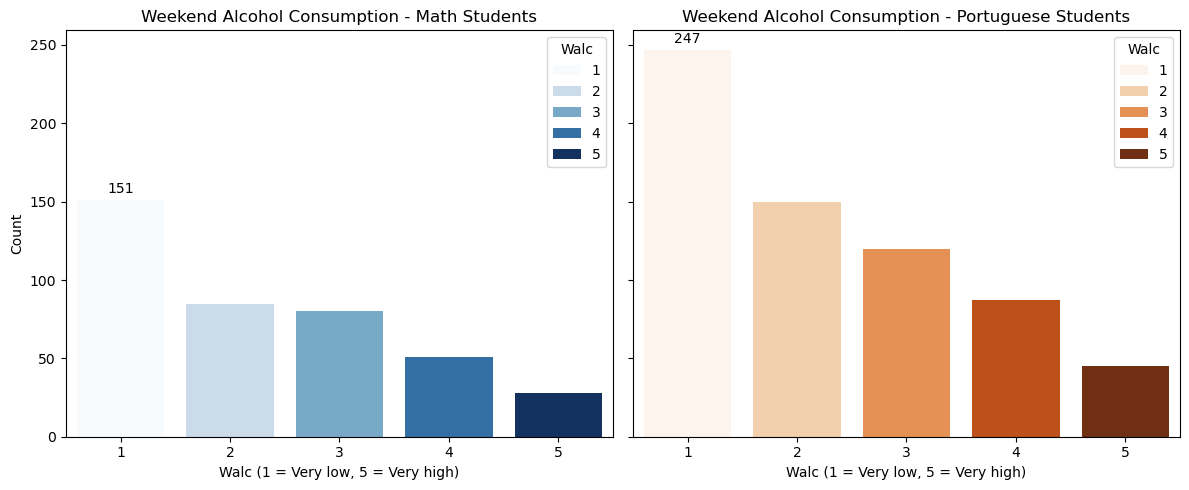

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
# Math dataset
sns.countplot(data=df_stu_mat, x='Walc', hue='Walc', ax=axes[0], palette='Blues', legend=True)
axes[0].set_title("Weekend Alcohol Consumption - Math Students")
axes[0].set_xlabel("Walc (1 = Very low, 5 = Very high)")
axes[0].set_ylabel("Count")
axes[0].bar_label(axes[0].containers[0], padding=3)
sns.countplot(data=df_stu_por, x='Walc', hue='Walc', ax=axes[1], palette='Oranges', legend=True)
# Portuguese dataset
axes[1].set_title("Weekend Alcohol Consumption - Portuguese Students")
axes[1].set_xlabel("Walc (1 = Very low, 5 = Very high)")
axes[1].set_ylabel("")
axes[1].bar_label(axes[1].containers[0], padding=3)
plt.tight_layout()
plt.show()

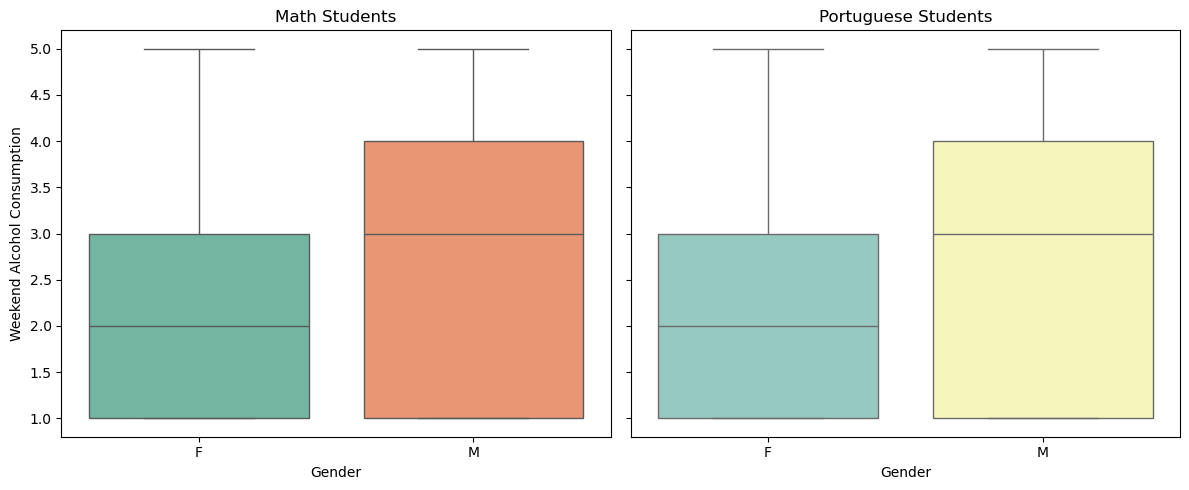

In [11]:
#Bivariate Analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
# Math dataset
sns.boxplot(x='sex', hue='sex', y='Walc', data=df_stu_mat, ax=axes[0], palette='Set2')
axes[0].set_title('Math Students')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Weekend Alcohol Consumption')
# Portuguese dataset
sns.boxplot(x='sex', hue='sex', y='Walc', data=df_stu_por, ax=axes[1], palette='Set3')
axes[1].set_title('Portuguese Students')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()

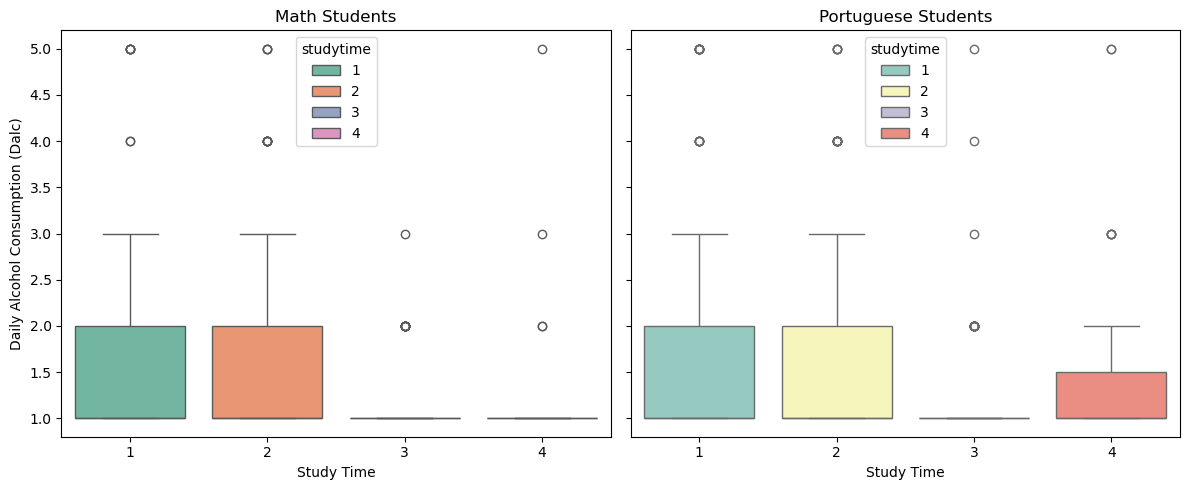

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
# Math dataset
sns.boxplot(x='studytime', hue='studytime', y='Dalc', data=df_stu_mat, ax=axes[0], palette='Set2')
axes[0].set_title('Math Students')
axes[0].set_xlabel('Study Time')
axes[0].set_ylabel('Daily Alcohol Consumption (Dalc)')
# Portuguese dataset
sns.boxplot(x='studytime', hue='studytime', y='Dalc', data=df_stu_por, ax=axes[1], palette='Set3')
axes[1].set_title('Portuguese Students')
axes[1].set_xlabel('Study Time')
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()

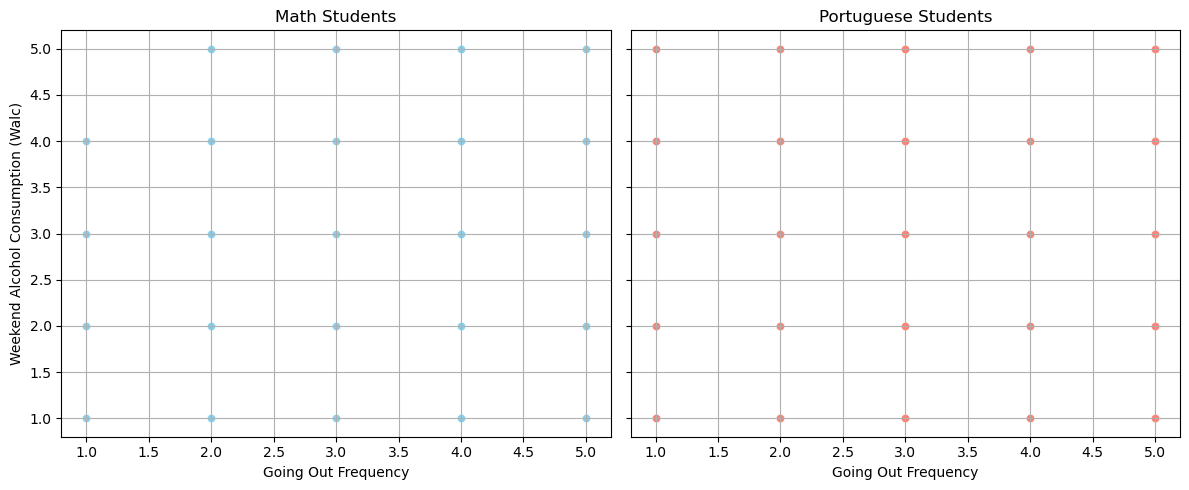

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
# Math Dataset
sns.scatterplot(x='goout', y='Walc', data=df_stu_mat, ax=axes[0], color='skyblue')
axes[0].set_title('Math Students')
axes[0].set_xlabel('Going Out Frequency')
axes[0].set_ylabel('Weekend Alcohol Consumption (Walc)')
axes[0].grid(True)
# Portuguese Dataset
sns.scatterplot(x='goout', y='Walc', data=df_stu_por, ax=axes[1], color='salmon')
axes[1].set_title('Portuguese Students')
axes[1].set_xlabel('Going Out Frequency')
axes[1].set_ylabel('')
axes[1].grid(True)
plt.tight_layout()
plt.show()

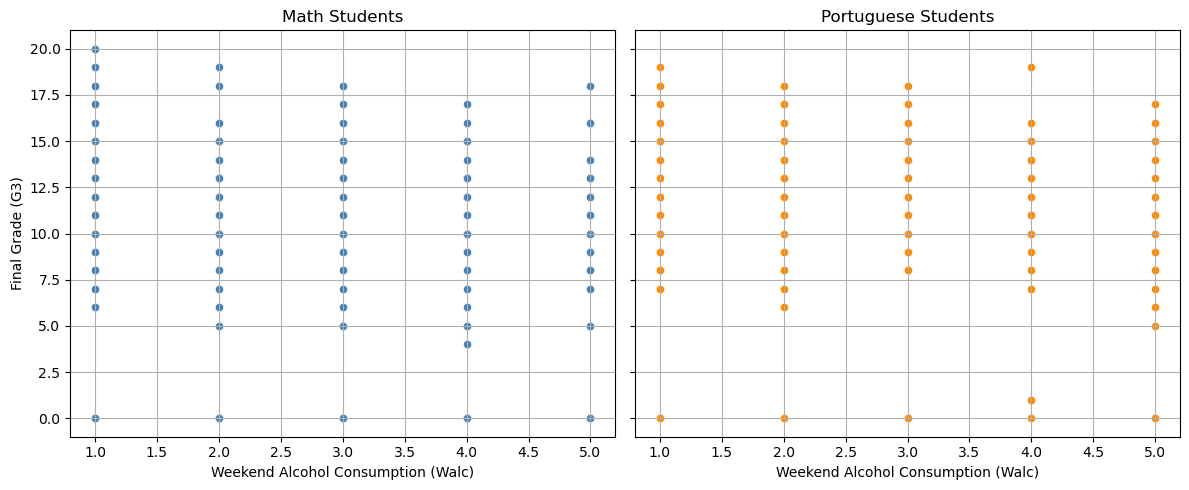

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
# Math Dataset
sns.scatterplot(x='Walc', y='G3', data=df_stu_mat, ax=axes[0], color='steelblue')
axes[0].set_title('Math Students')
axes[0].set_xlabel('Weekend Alcohol Consumption (Walc)')
axes[0].set_ylabel('Final Grade (G3)')
axes[0].grid(True)
# Portuguese Dataset
sns.scatterplot(x='Walc', y='G3', data=df_stu_por, ax=axes[1], color='darkorange')
axes[1].set_title('Portuguese Students')
axes[1].set_xlabel('Weekend Alcohol Consumption (Walc)')
axes[1].set_ylabel('')
axes[1].grid(True)
plt.tight_layout()
plt.show()

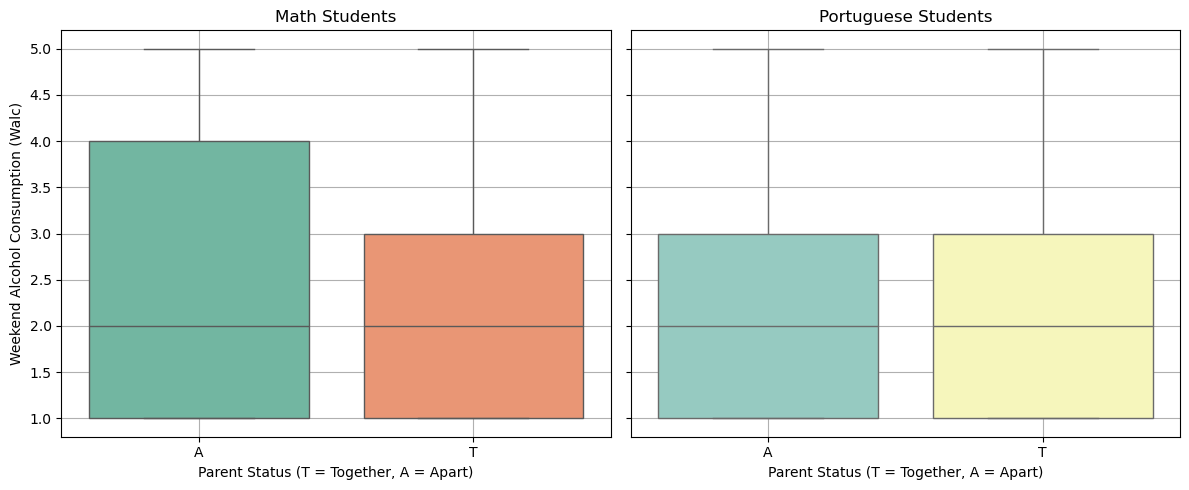

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
# Math dataset
sns.boxplot(x='Pstatus', hue='Pstatus', y='Walc', data=df_stu_mat, ax=axes[0], palette='Set2')
axes[0].set_title('Math Students')
axes[0].set_xlabel('Parent Status (T = Together, A = Apart)')
axes[0].set_ylabel('Weekend Alcohol Consumption (Walc)')
axes[0].grid(True)
# Portuguese dataset
sns.boxplot(x='Pstatus', hue='Pstatus', y='Walc', data=df_stu_por, ax=axes[1], palette='Set3')
axes[1].set_title('Portuguese Students')
axes[1].set_xlabel('Parent Status (T = Together, A = Apart)')
axes[1].set_ylabel('')
axes[1].grid(True)
plt.tight_layout()
plt.show()

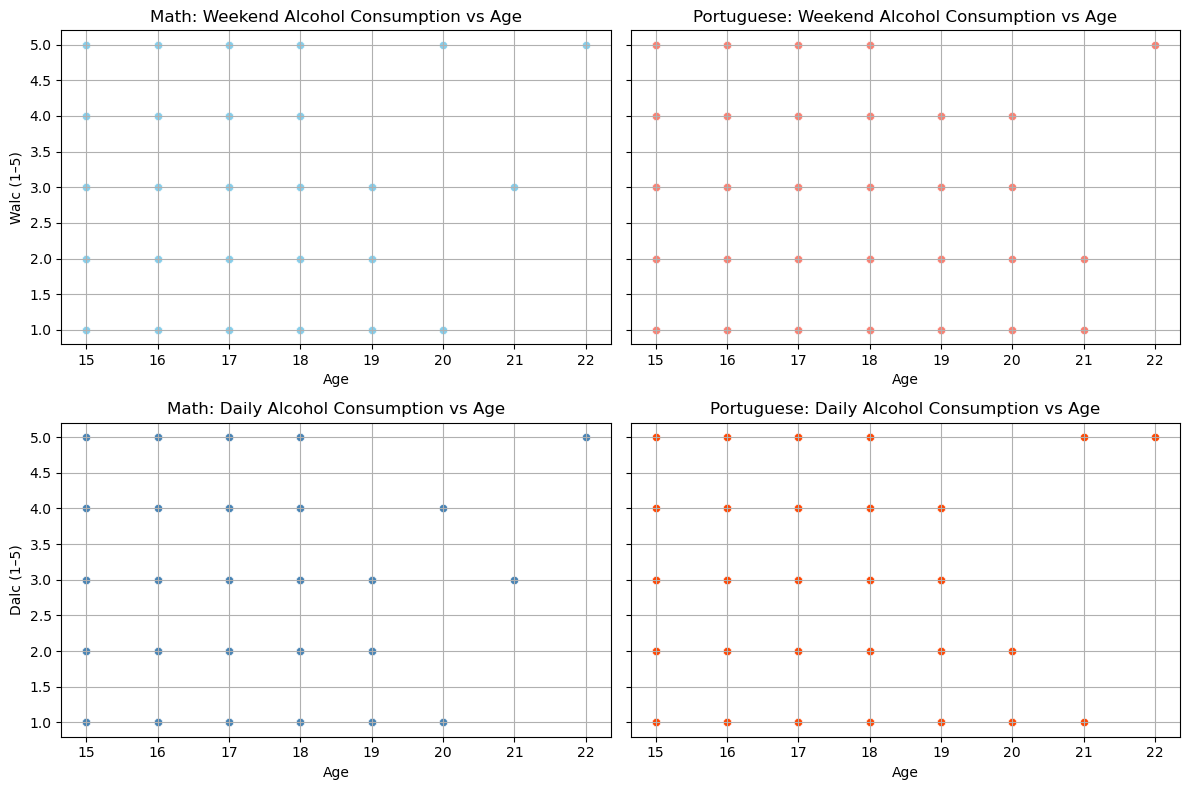

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
# Math - Walc
sns.scatterplot(x='age', y='Walc', data=df_stu_mat, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Math: Weekend Alcohol Consumption vs Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Walc (1–5)')
axes[0, 0].grid(True)
# Math - Dalc
sns.scatterplot(x='age', y='Dalc', data=df_stu_mat, ax=axes[1, 0], color='steelblue')
axes[1, 0].set_title('Math: Daily Alcohol Consumption vs Age')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Dalc (1–5)')
axes[1, 0].grid(True)
# Portuguese - Walc
sns.scatterplot(x='age', y='Walc', data=df_stu_por, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Portuguese: Weekend Alcohol Consumption vs Age')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('')
axes[0, 1].grid(True)
# Portuguese - Dalc
sns.scatterplot(x='age', y='Dalc', data=df_stu_por, ax=axes[1, 1], color='orangered')
axes[1, 1].set_title('Portuguese: Daily Alcohol Consumption vs Age')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('')
axes[1, 1].grid(True)
plt.tight_layout()
plt.show()

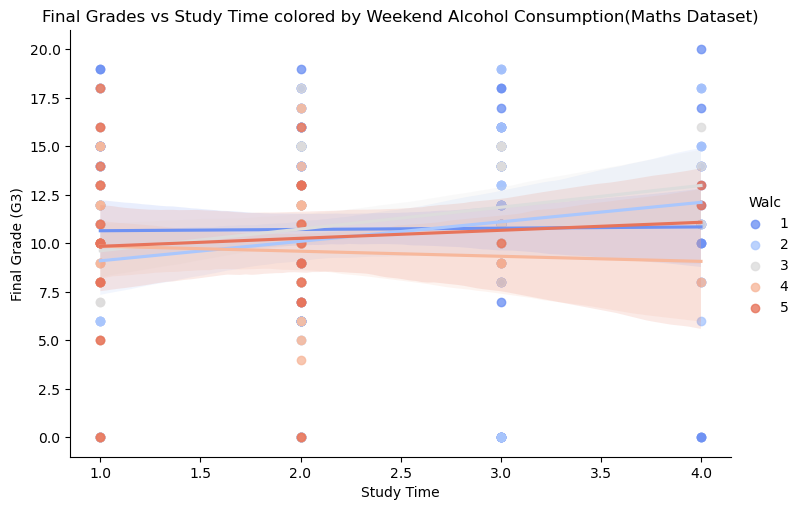

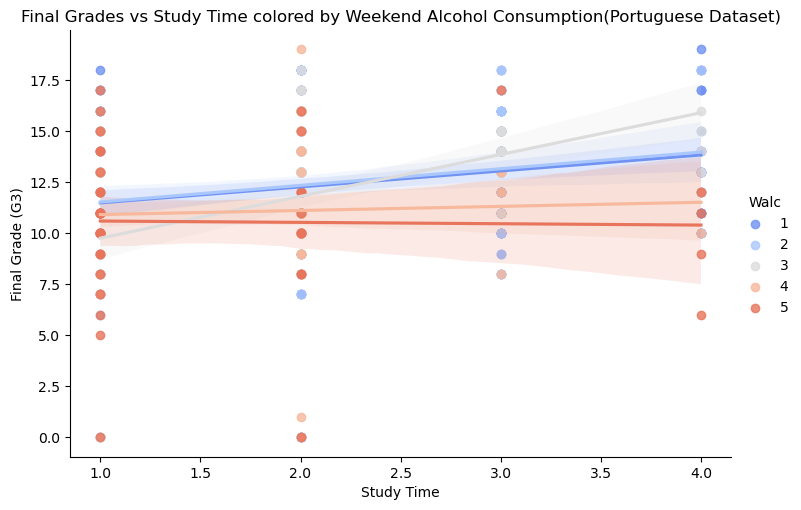

In [17]:
#Multivariate Analysis
# Math dataset
sns.lmplot(x='studytime', y='G3', hue='Walc', data=df_stu_mat, palette='coolwarm', aspect=1.5)
plt.title('Final Grades vs Study Time colored by Weekend Alcohol Consumption(Maths Dataset)')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()
# Portuguese dataset
sns.lmplot(x='studytime', y='G3', hue='Walc', data=df_stu_por, palette='coolwarm', aspect=1.5)
plt.title('Final Grades vs Study Time colored by Weekend Alcohol Consumption(Portuguese Dataset)')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()

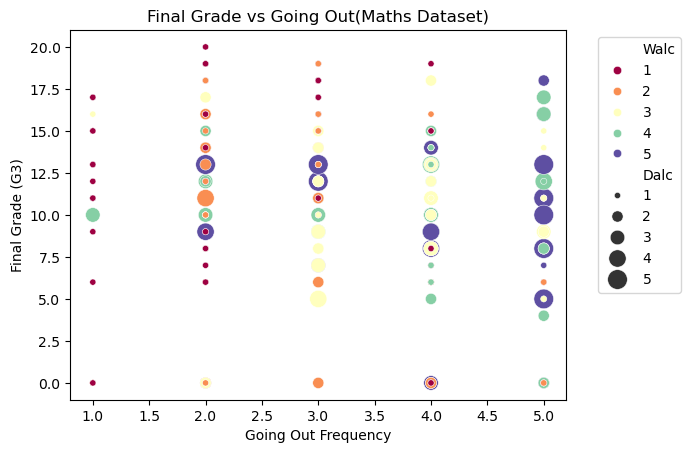

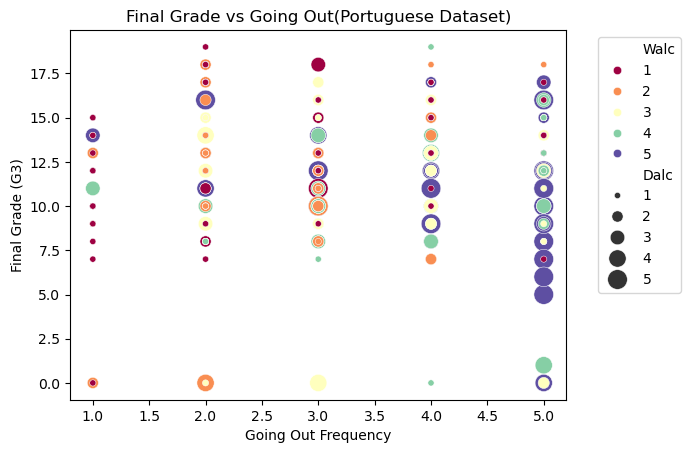

In [18]:
#Math dataset
sns.scatterplot(data=df_stu_mat, x='goout', y='G3', hue='Walc', size='Dalc', palette='Spectral', sizes=(20, 200))
plt.title("Final Grade vs Going Out(Maths Dataset)")
plt.xlabel("Going Out Frequency")
plt.ylabel("Final Grade (G3)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()
# Portuguese dataset
sns.scatterplot(data=df_stu_por, x='goout', y='G3', hue='Walc', size='Dalc', palette='Spectral', sizes=(20, 200))
plt.title("Final Grade vs Going Out(Portuguese Dataset)")
plt.xlabel("Going Out Frequency")
plt.ylabel("Final Grade (G3)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

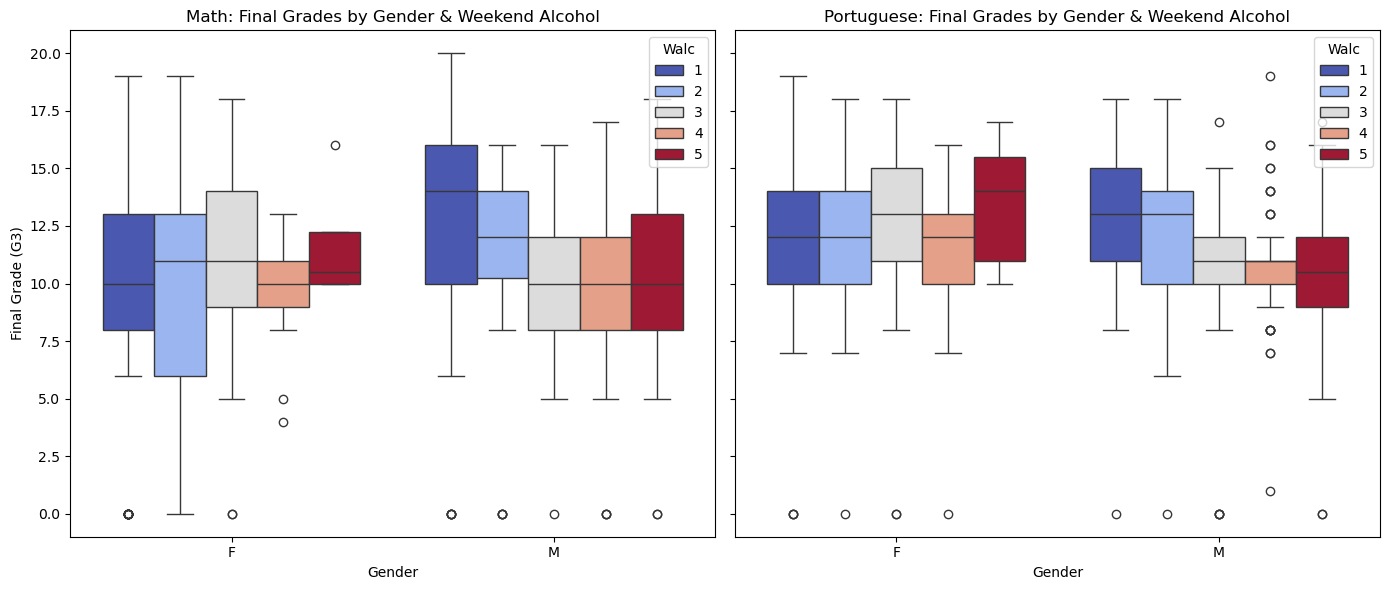

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
# Math dataset
sns.boxplot(x='sex', y='G3', hue='Walc', data=df_stu_mat, ax=axes[0], palette='coolwarm')
axes[0].set_title('Math: Final Grades by Gender & Weekend Alcohol')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Final Grade (G3)')
axes[0].legend(title='Walc', loc='upper right')
# Portuguese dataset
sns.boxplot(x='sex', y='G3', hue='Walc', data=df_stu_por, ax=axes[1], palette='coolwarm')
axes[1].set_title('Portuguese: Final Grades by Gender & Weekend Alcohol')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('')
axes[1].legend(title='Walc', loc='upper right')
plt.tight_layout()
plt.show()

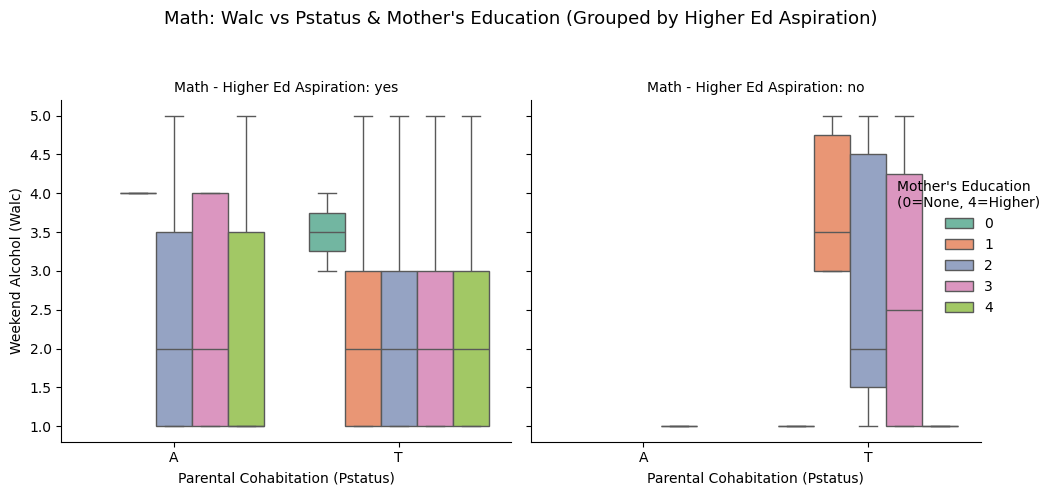

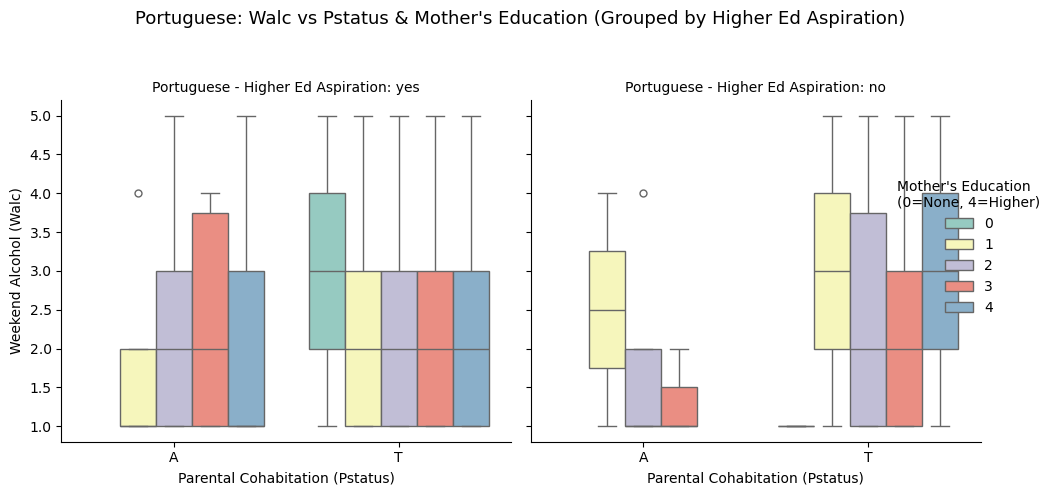

In [20]:
# Math dataset
g1 = sns.catplot(
    data=df_stu_mat,
    x='Pstatus',
    y='Walc',
    col='higher',
    kind='box',
    hue='Medu',
    palette='Set2',
    height=5,
    aspect=1
)
g1.set_axis_labels("Parental Cohabitation (Pstatus)", "Weekend Alcohol (Walc)")
g1.set_titles("Math - Higher Ed Aspiration: {col_name}")
g1._legend.set_title("Mother's Education\n(0=None, 4=Higher)")
g1.fig.subplots_adjust(top=0.8)
g1.fig.suptitle("Math: Walc vs Pstatus & Mother's Education (Grouped by Higher Ed Aspiration)", fontsize=13)
# Portuguese dataset
g2 = sns.catplot(
    data=df_stu_por,
    x='Pstatus',
    y='Walc',
    col='higher',
    kind='box',
    hue='Medu',
    palette='Set3',
    height=5,
    aspect=1
)
g2.set_axis_labels("Parental Cohabitation (Pstatus)", "Weekend Alcohol (Walc)")
g2.set_titles("Portuguese - Higher Ed Aspiration: {col_name}")
g2._legend.set_title("Mother's Education\n(0=None, 4=Higher)")
g2.fig.subplots_adjust(top=0.8)
g2.fig.suptitle("Portuguese: Walc vs Pstatus & Mother's Education (Grouped by Higher Ed Aspiration)", fontsize=13)
plt.show()

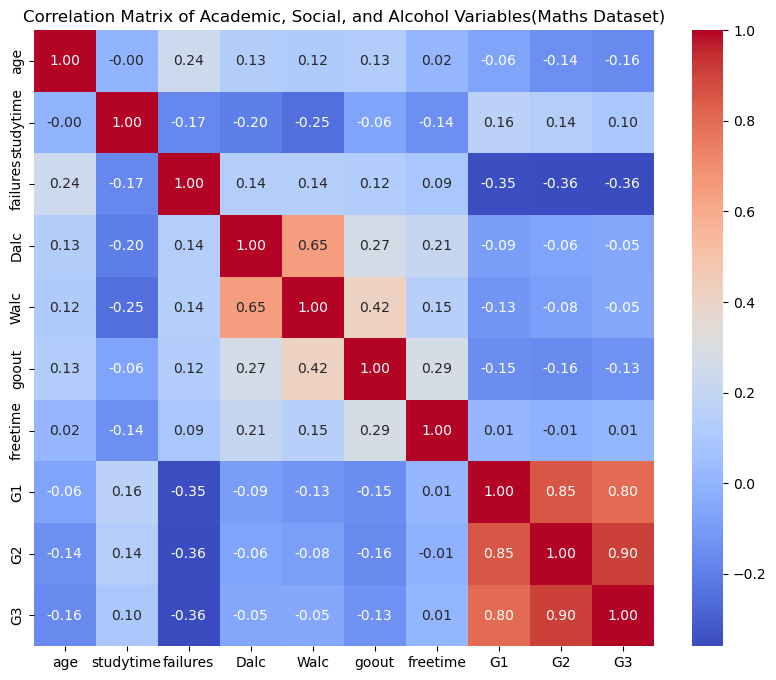

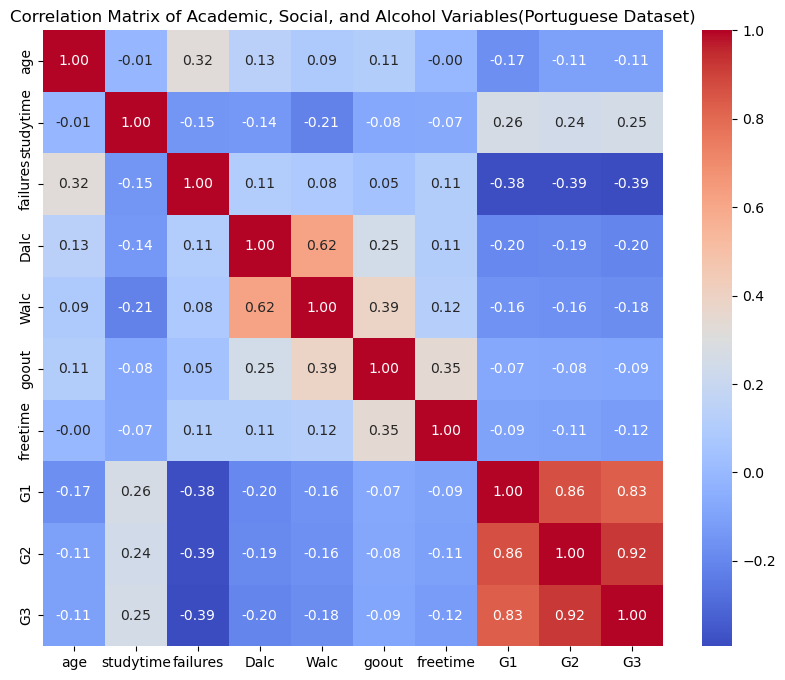

In [21]:
# Math dataset
cols = ['age', 'studytime', 'failures', 'Dalc', 'Walc', 'goout', 'freetime', 'G1', 'G2', 'G3']
corr_matrix = df_stu_mat[cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Academic, Social, and Alcohol Variables(Maths Dataset)")
plt.show()
# Portuguese dataset
cols = ['age', 'studytime', 'failures', 'Dalc', 'Walc', 'goout', 'freetime', 'G1', 'G2', 'G3']
corr_matrix_por = df_stu_por[cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_por, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Academic, Social, and Alcohol Variables(Portuguese Dataset)")
plt.show()

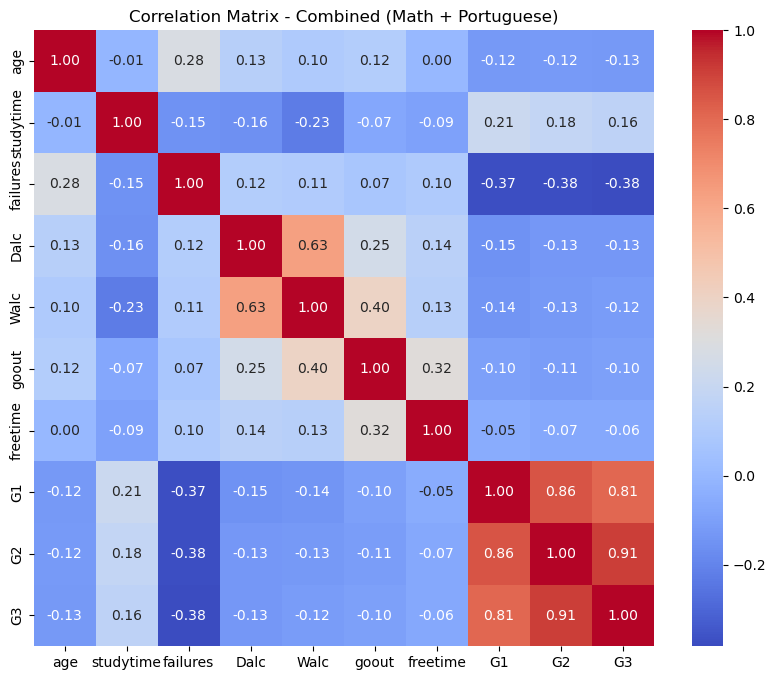

In [22]:
df_stu_mat['subject'] = 'Math'
df_stu_por['subject'] = 'Portuguese'
df = pd.concat([df_stu_mat, df_stu_por], ignore_index=True)
cols = ['age', 'studytime', 'failures', 'Dalc', 'Walc', 'goout', 'freetime', 'G1', 'G2', 'G3']
corr_matrix_combined = df[cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_combined, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Combined (Math + Portuguese)")
plt.show()

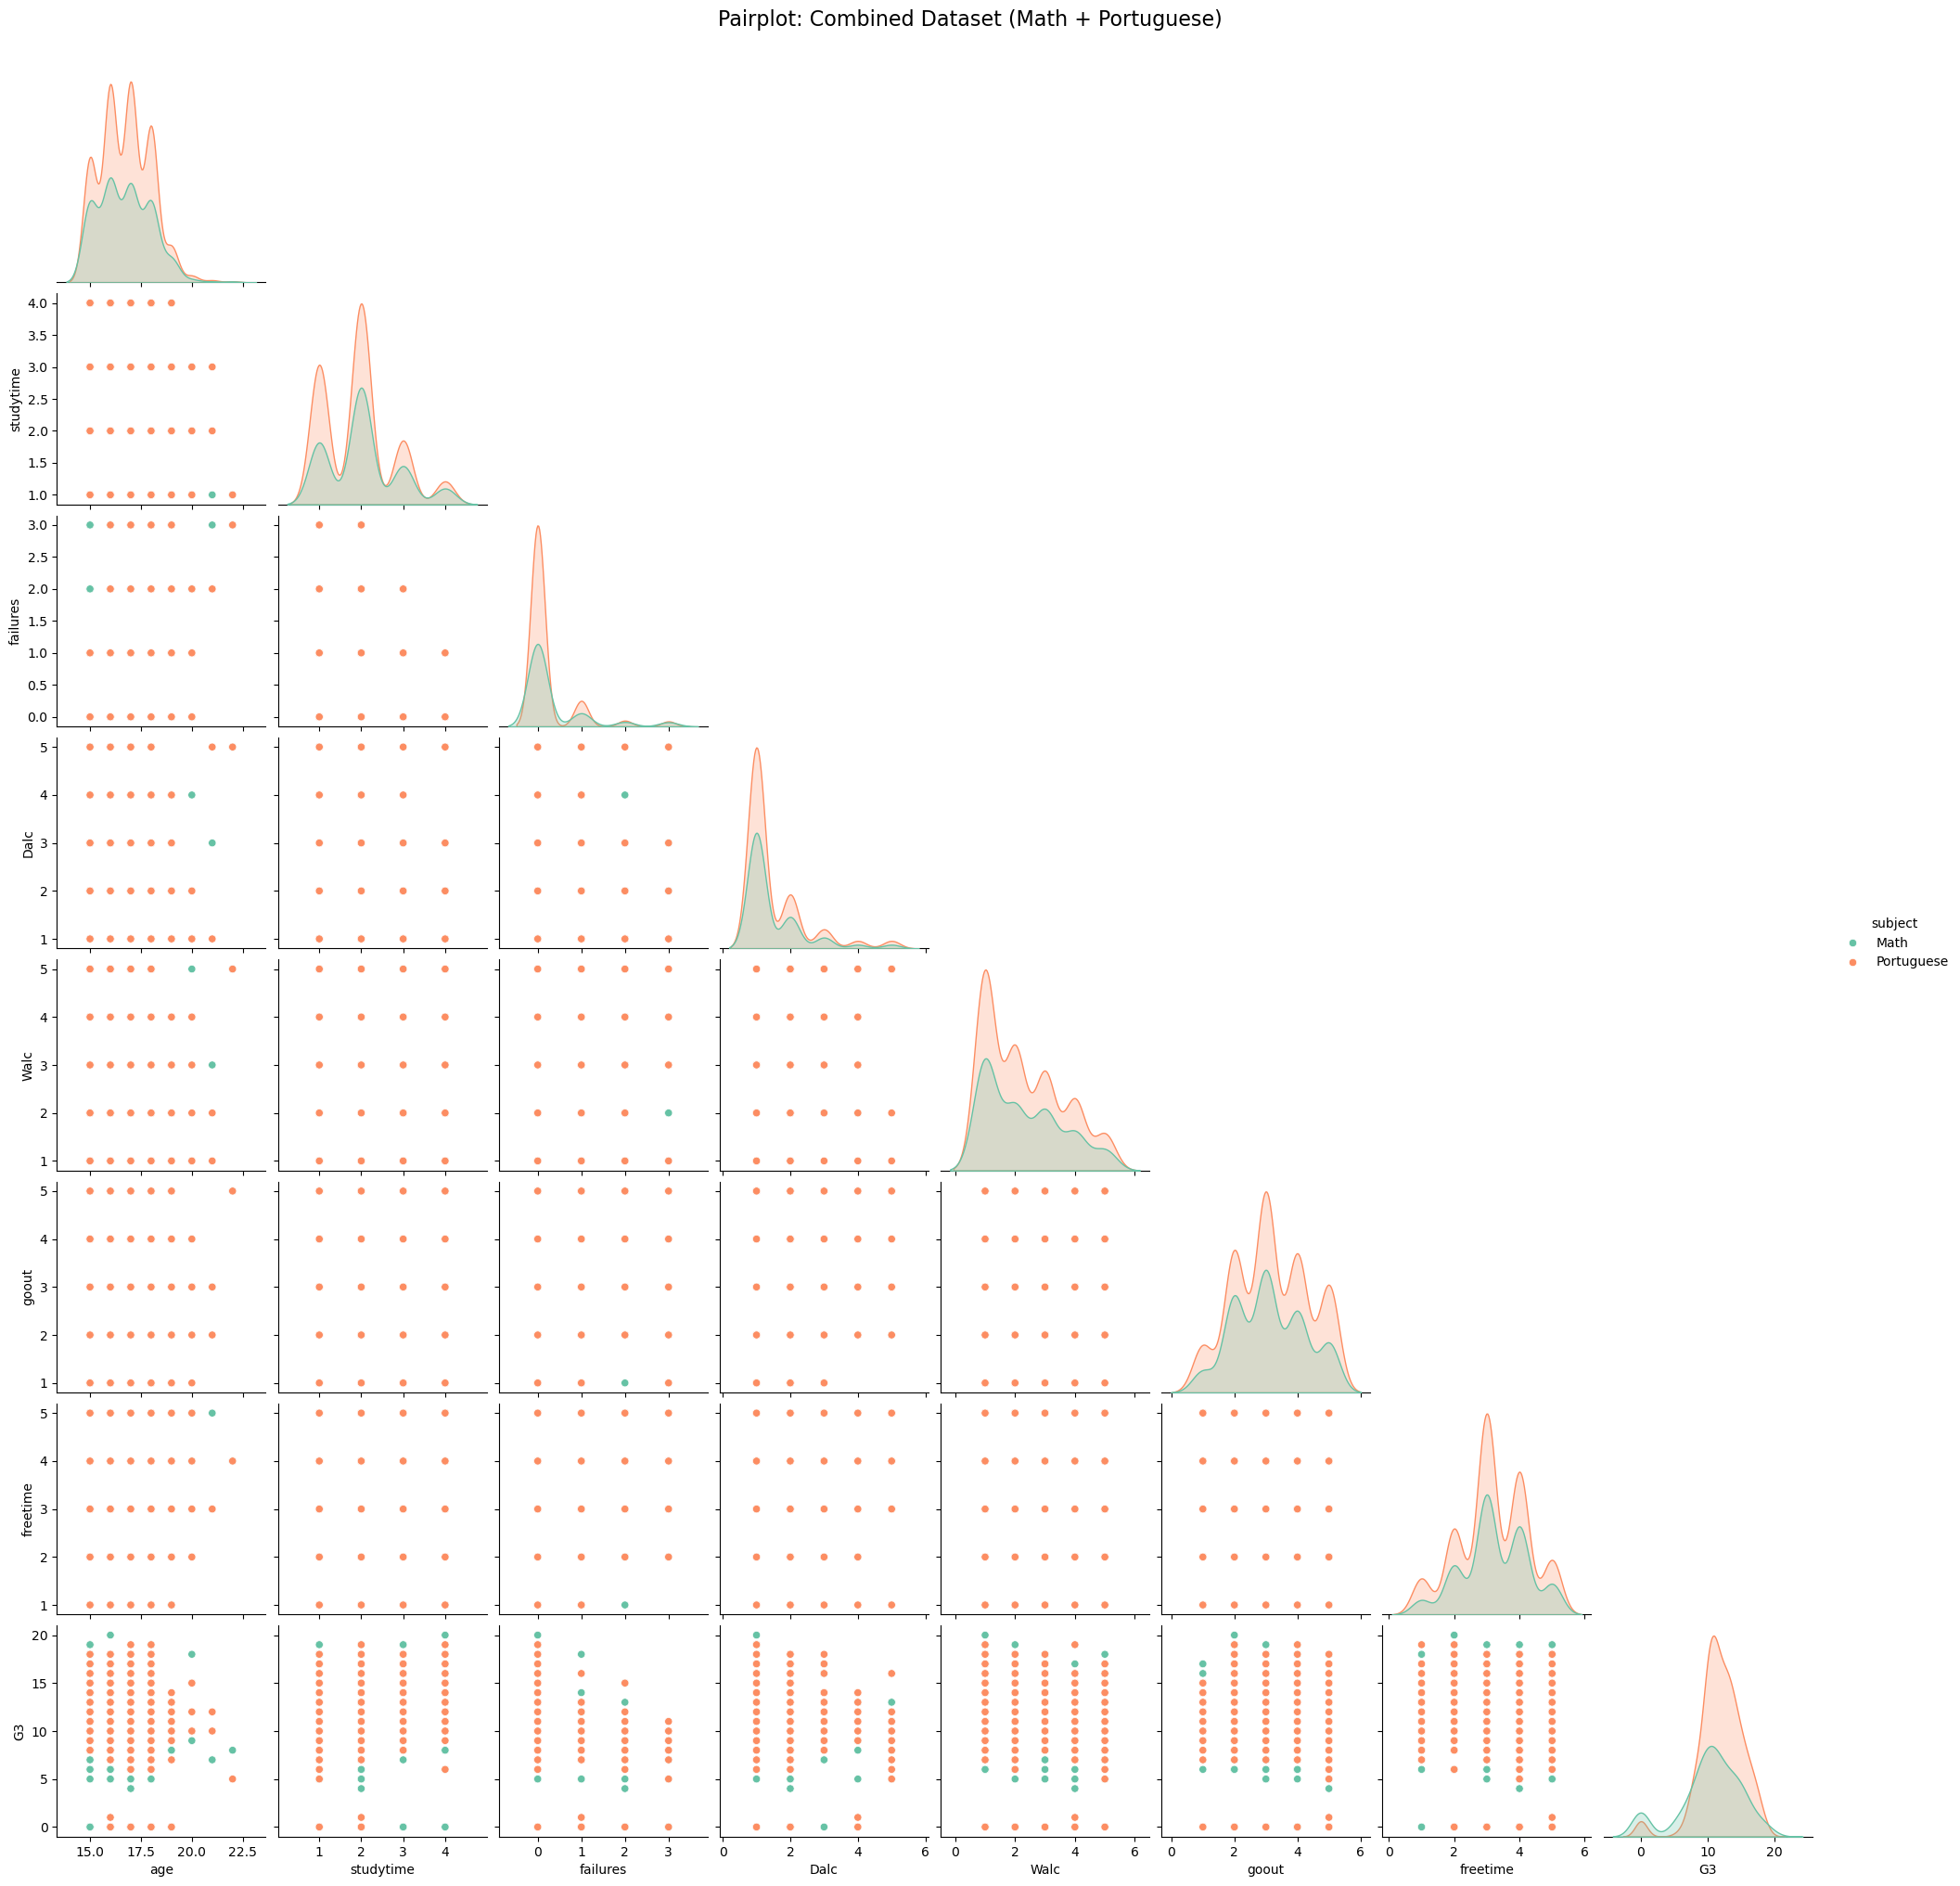

In [23]:
plot_cols = ['age', 'studytime', 'failures', 'Dalc', 'Walc', 'goout', 'freetime', 'G3']
sns.pairplot(df[plot_cols + ['subject']], hue='subject', palette='Set2', diag_kind='kde', corner=True)
plt.suptitle("Pairplot: Combined Dataset (Math + Portuguese)", fontsize=16, y=1.02)
plt.show()

In [24]:
df_stu_mat['subject'] = 'Math'
df_stu_por['subject'] = 'Portuguese'
df = pd.concat([df_stu_mat, df_stu_por], ignore_index=True)
print("Combined dataset shape:", df.shape)

Combined dataset shape: (1044, 34)


In [25]:
df.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)

In [26]:
X = df.drop('Walc', axis=1)
y = df['Walc'] 

In [27]:
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [29]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Classification Report for Walc Prediction:
              precision    recall  f1-score   support

           1       0.74      0.96      0.83        90
           2       0.79      0.50      0.61        44
           3       0.61      0.58      0.59        33
           4       0.76      0.64      0.70        25
           5       1.00      0.76      0.87        17

    accuracy                           0.75       209
   macro avg       0.78      0.69      0.72       209
weighted avg       0.75      0.75      0.74       209

Model Accuracy for Walc Prediction: 74.64%


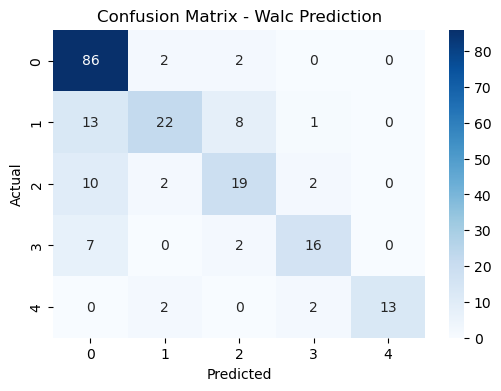

In [30]:
print("Classification Report for Walc Prediction:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy for Walc Prediction: {accuracy * 100:.2f}%")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - Walc Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [31]:
#new input for prediction
new_student = {
    'school': 'GP',
    'sex': 'F',
    'age': 17,
    'address': 'U',
    'famsize': 'GT3',
    'Pstatus': 'T',
    'Medu': 4,
    'Fedu': 3,
    'Mjob': 'teacher',
    'Fjob': 'services',
    'reason': 'course',
    'guardian': 'mother',
    'traveltime': 1,
    'studytime': 3,
    'failures': 0,
    'schoolsup': 'no',
    'famsup': 'yes',
    'paid': 'no',
    'activities': 'yes',
    'nursery': 'yes',
    'higher': 'yes',
    'internet': 'yes',
    'romantic': 'no',
    'famrel': 4,
    'freetime': 3,
    'goout': 2,
    'Dalc': 2,
    'health': 5,
    'absences': 2,
    'subject': 'Math'
}
new_df = pd.DataFrame([new_student])
for col in new_df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    le.fit(df[col])
    new_df[col] = le.transform(new_df[col])
predicted_walc = clf.predict(new_df)
print(f" Predicted Weekend Alcohol Consumption (Walc): {predicted_walc[0]}")

 Predicted Weekend Alcohol Consumption (Walc): 2


In [32]:
df['alcohol_risk'] = ((df['Walc'] + df['Dalc']) > 6).astype(int)

In [33]:
X = df.drop(['Walc', 'Dalc', 'G1', 'G2', 'G3', 'alcohol_risk'], axis=1, errors='ignore')
y = df['alcohol_risk']

In [34]:
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [36]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Classification Report for Alcohol Risk Prediction:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       188
           1       1.00      0.33      0.50        21

    accuracy                           0.93       209
   macro avg       0.97      0.67      0.73       209
weighted avg       0.94      0.93      0.92       209

Model Accuracy: 93.30%


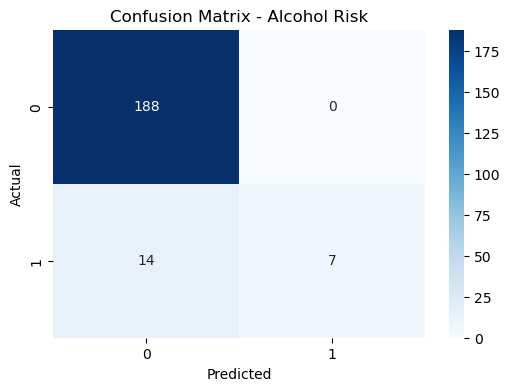

In [37]:
print("Classification Report for Alcohol Risk Prediction:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - Alcohol Risk")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
#new input for prediction
new_student = {
    'school': 'GP',
    'sex': 'F',
    'age': 17,
    'address': 'U',
    'famsize': 'GT3',
    'Pstatus': 'T',
    'Medu': 4,
    'Fedu': 3,
    'Mjob': 'teacher',
    'Fjob': 'services',
    'reason': 'course',
    'guardian': 'mother',
    'traveltime': 1,
    'studytime': 3,
    'failures': 0,
    'schoolsup': 'no',
    'famsup': 'yes',
    'paid': 'no',
    'activities': 'yes',
    'nursery': 'yes',
    'higher': 'yes',
    'internet': 'yes',
    'romantic': 'no',
    'famrel': 4,
    'freetime': 3,
    'goout': 2,
    'health': 5,
    'absences': 2,
    'subject': 'Math'
}
new_df = pd.DataFrame([new_student])
for col in new_df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    le.fit(df[col])
    new_df[col] = le.transform(new_df[col])
predicted_risk = clf.predict(new_df)
print(f"🚨 Predicted Alcohol Risk (0 = Low, 1 = High): {predicted_risk[0]}")

🚨 Predicted Alcohol Risk (0 = Low, 1 = High): 0
